In [ ]:
!pip install kagglehub

In [ ]:
import torch
import os
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [ ]:
BASE_DIR = "/kaggle/input/new-plant-diseases-dataset"
BASE_DIR += "/New Plant Diseases Dataset(Augmented)"
BASE_DIR += "/New Plant Diseases Dataset(Augmented)"
TRAIN_DIR = BASE_DIR + "/train"
VALIDATION_DIR = BASE_DIR + "/valid"
os.listdir(BASE_DIR)

['valid', 'train']

In [ ]:
TEST_DIR = "/kaggle/input/new-plant-diseases-dataset/test/test"


In [ ]:
disease_class = os.listdir(TRAIN_DIR)
disease_class_valid = os.listdir(VALIDATION_DIR)
disease_class_test = os.listdir(TEST_DIR)

In [ ]:
train = ImageFolder(TRAIN_DIR, transform=transforms.ToTensor())

valid = ImageFolder(VALIDATION_DIR, transform=transforms.ToTensor())

In [ ]:
batch_size = 32

train_dataloader = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dataloader = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
train[1]

(tensor([[[0.5294, 0.5098, 0.4941,  ..., 0.4745, 0.4745, 0.4784],
          [0.5137, 0.5098, 0.5098,  ..., 0.4745, 0.4745, 0.4784],
          [0.5020, 0.5137, 0.5255,  ..., 0.4745, 0.4784, 0.4824],
          ...,
          [0.1961, 0.1961, 0.1922,  ..., 0.3412, 0.3490, 0.3529],
          [0.1804, 0.1804, 0.1804,  ..., 0.3412, 0.3451, 0.3490],
          [0.1686, 0.1686, 0.1647,  ..., 0.3412, 0.3451, 0.3451]],
 
         [[0.5020, 0.4824, 0.4667,  ..., 0.4549, 0.4549, 0.4588],
          [0.4863, 0.4824, 0.4824,  ..., 0.4549, 0.4549, 0.4588],
          [0.4745, 0.4863, 0.4980,  ..., 0.4549, 0.4588, 0.4627],
          ...,
          [0.1333, 0.1333, 0.1294,  ..., 0.3098, 0.3176, 0.3216],
          [0.1216, 0.1216, 0.1216,  ..., 0.3137, 0.3176, 0.3216],
          [0.1098, 0.1098, 0.1059,  ..., 0.3137, 0.3176, 0.3176]],
 
         [[0.7020, 0.6824, 0.6667,  ..., 0.6745, 0.6745, 0.6784],
          [0.6863, 0.6824, 0.6824,  ..., 0.6745, 0.6745, 0.6784],
          [0.6745, 0.6863, 0.6980,  ...,

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_image(image, label):
    print("Label: "+ train.classes[label])
    plt.imshow(image.permute(1, 2, 0))

Label: Cherry_(including_sour)___healthy


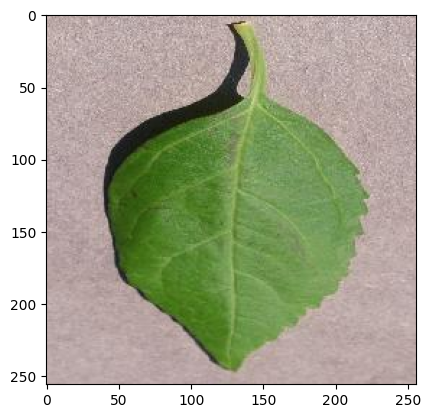

In [ ]:
demo_img, demo_label = train[12345]
show_image(demo_img, demo_label)

In [ ]:
pip install colorama

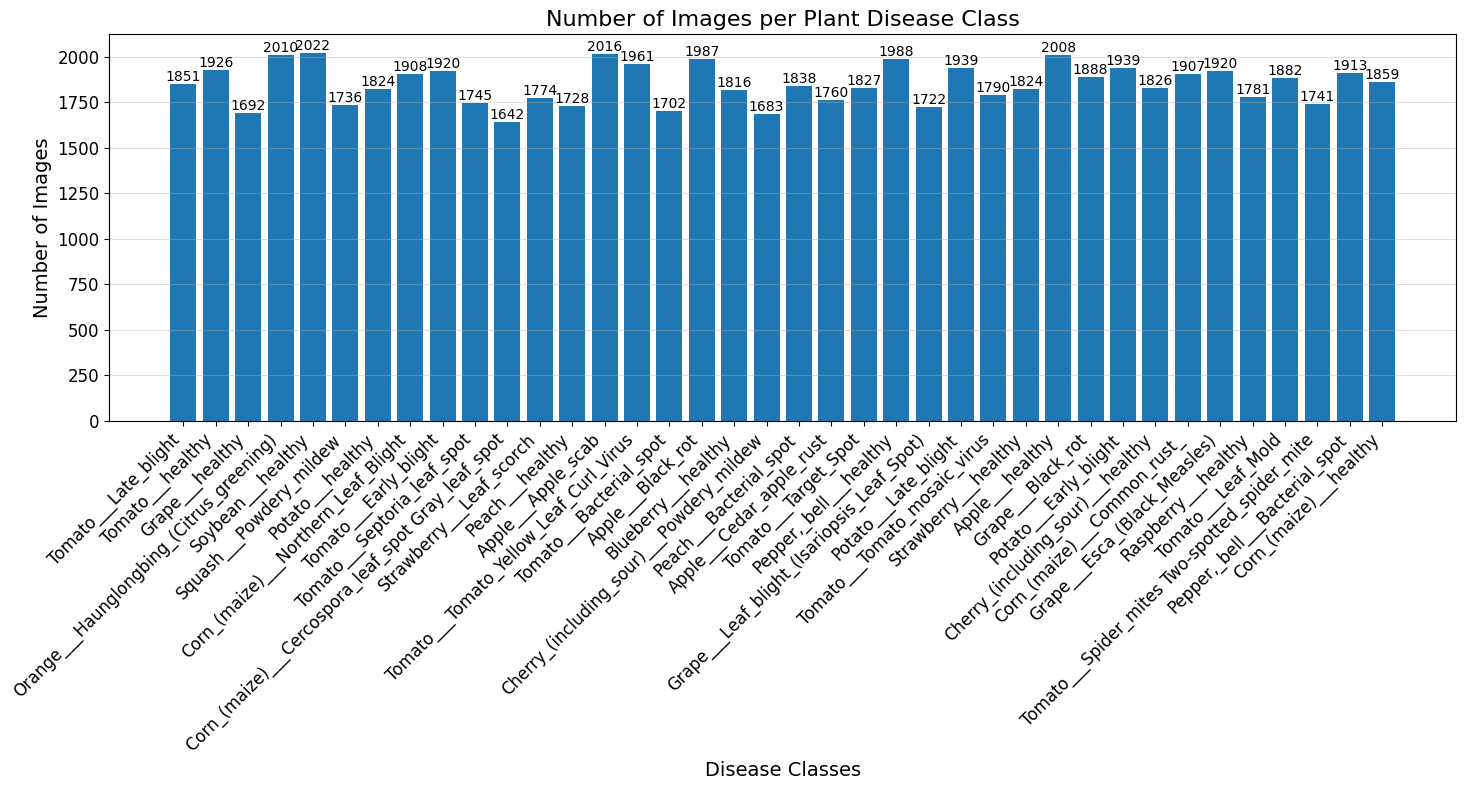


Image Count Summary:
Tomato___Late_blight          :  1851 images
Tomato___healthy              :  1926 images
Grape___healthy               :  1692 images
Orange___Haunglongbing_(Citrus_greening):  2010 images
Soybean___healthy             :  2022 images
Squash___Powdery_mildew       :  1736 images
Potato___healthy              :  1824 images
Corn_(maize)___Northern_Leaf_Blight:  1908 images
Tomato___Early_blight         :  1920 images
Tomato___Septoria_leaf_spot   :  1745 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot:  1642 images
Strawberry___Leaf_scorch      :  1774 images
Peach___healthy               :  1728 images
Apple___Apple_scab            :  2016 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus:  1961 images
Tomato___Bacterial_spot       :  1702 images
Apple___Black_rot             :  1987 images
Blueberry___healthy           :  1816 images
Cherry_(including_sour)___Powdery_mildew:  1683 images
Peach___Bacterial_spot        :  1838 images
Apple___Cedar_apple_rust 

In [ ]:
import matplotlib.pyplot as plt
import os
from colorama import Fore, Style

# Correct the variable name from train_dir to TRAIN_DIR
label_counts = {}
for label in disease_class:
    image_paths = os.listdir(os.path.join(TRAIN_DIR, label))
    label_counts[label] = len(image_paths)

plt.figure(figsize=(15, 8))
bars = plt.bar(label_counts.keys(), label_counts.values())

plt.title('Number of Images per Plant Disease Class', fontsize=16)
plt.xlabel('Disease Classes', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.4)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(Fore.GREEN + "\nImage Count Summary:")
for label, count in label_counts.items():
    print(f"{label:<30}: {count:>5} images")
print(Style.RESET_ALL + f"\nTotal images: {sum(label_counts.values())}")

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dataloader:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)

In [ ]:
device = get_default_device()

In [ ]:
device

device(type='cuda')

In [ ]:
train_dataloader = DeviceDataLoader(train_dataloader, device)
valid_dataloader = DeviceDataLoader(valid_dataloader, device)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        # Detach both to save memory during validation
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()

        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()

        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], "
              f"train_loss: {result['train_loss']:.4f}, "
              f"val_loss: {result['val_loss']:.4f}, "
              f"val_acc: {result['val_acc']:.4f}")

In [ ]:
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

In [ ]:
class CNN_NeuralNet(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()

        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True)
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))

        self.conv3 = ConvBlock(128, 256, pool=True)
        self.conv4 = ConvBlock(256, 512, pool=True)

        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = to_device(CNN_NeuralNet(3, len(train.classes)), device)
print(model)

CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []

    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)

    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,
                                                epochs=epochs, steps_per_epoch=len(train_loader))

    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            lrs.append(get_lr(optimizer))
            sched.step()
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)

    return history


In [ ]:
num_epoch = 5
lr_rate = 0.01
grad_clip = 0.15
weight_decay = 1e-4
optims = torch.optim.Adam
history = [evaluate(model, valid_dataloader)]
history += fit_OneCycle(
    num_epoch, lr_rate, model, train_dataloader, valid_dataloader,
    grad_clip=grad_clip,
    weight_decay=weight_decay,
    opt_func=optims
)


Epoch [0], train_loss: 0.4299, val_loss: 0.6624, val_acc: 0.8252
Epoch [1], train_loss: 0.3230, val_loss: 0.7937, val_acc: 0.7798
Epoch [2], train_loss: 0.2098, val_loss: 0.2300, val_acc: 0.9278
Epoch [3], train_loss: 0.0972, val_loss: 0.0650, val_acc: 0.9786
Epoch [4], train_loss: 0.0244, val_loss: 0.0228, val_acc: 0.9925


In [ ]:
torch.save(model.state_dict(), "plant_disease_model.pth")

In [26]:
import gradio as gr
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

In [27]:

num_classes = 38
model = CNN_NeuralNet(3, num_classes)

model.load_state_dict(torch.load("plant_disease_model.pth", map_location='cpu'))
model.eval()

print("Model loaded successfully!")
print(model)

Model loaded successfully!
CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [28]:
class_names = {
    0: 'Tomato___Late_blight', 1: 'Tomato___healthy', 2: 'Grape___healthy', 3: 'Orange___Haunglongbing_(Citrus_greening)',
    4: 'Soybean___healthy', 5: 'Squash___Powdery_mildew', 6: 'Potato___healthy', 7: 'Corn_(maize)___Northern_Leaf_Blight',
    8: 'Tomato___Early_blight', 9: 'Tomato___Septoria_leaf_spot', 10: 'Corn_(maize)___Cercospora_leaf_spot_Gray_leaf_spot',
    11: 'Strawberry___Leaf_scorch', 12: 'Peach___healthy', 13: 'Apple___Apple_scab', 14: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    15: 'Tomato___Bacterial_spot', 16: 'Apple___Black_rot', 17: 'Blueberry___healthy', 18: 'Cherry_(including_sour)___Powdery_mildew',
    19: 'Peach___Bacterial_spot', 20: 'Apple___Cedar_apple_rust', 21: 'Tomato___Target_Spot', 22: 'Pepper,_bell___healthy',
    23: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 24: 'Potato___Late_blight', 25: 'Tomato___Tomato_mosaic_virus',
    26: 'Strawberry___healthy', 27: 'Apple___healthy', 28: 'Grape___Black_rot', 29: 'Potato___Early_blight',
    30: 'Cherry_(including_sour)___healthy', 31: 'Corn_(maize)___Common_rust_', 32: 'Grape___Esca_(Black_Measles)',
    33: 'Raspberry___healthy', 34: 'Tomato___Leaf_Mold', 35: 'Tomato___Spider_mites_Two-spotted_spider_mite',
    36: 'Pepper,_bell___Bacterial_spot', 37: 'Corn_(maize)___healthy'
}


In [29]:
from PIL import Image
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Function to predict
def predict_disease(image_path, model, class_names):

    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0)

    # Make prediction
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        confidence, predicted_idx = torch.max(probabilities, 1)

    predicted_class = class_names[predicted_idx.item()]
    confidence_score = confidence.item() * 100

    return predicted_class, confidence_score



# Test prediction
image_path = "TomatoHealthy3.JPG"
predicted_class, confidence = predict_disease(image_path, model, class_names)
print(f"Predicted Disease: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

Predicted Disease: Corn_(maize)___healthy
Confidence: 100.00%
